In [12]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:

data = pd.read_csv("D:/FreeLance work/dataset_1.csv")

In [ ]:

threshold = 0.2
missing_percentage = data.isnull().sum() / len(data)
filtered_data = data.loc[:, missing_percentage <= threshold]

In [ ]:

categorical_cols = filtered_data.select_dtypes(include=['object']).columns
numerical_cols = filtered_data.select_dtypes(exclude=['object']).columns

In [ ]:

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    filtered_data[col] = le.fit_transform(filtered_data[col].astype(str))
    label_encoders[col] = le

imputer = IterativeImputer(max_iter=10, random_state=42)
imputed_data_numerical = pd.DataFrame(imputer.fit_transform(filtered_data[numerical_cols]), columns=numerical_cols)
imputed_data = pd.concat([imputed_data_numerical, filtered_data[categorical_cols]], axis=1)


In [ ]:

X = imputed_data.drop('AKI', axis=1)  
y = imputed_data['AKI']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Making Predictions
y_pred = knn_model.predict(X_test)
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8348623853211009
AUC Score: 0.7000000000000001
Classification Report:
              precision    recall  f1-score   support

         0.0       0.41      0.21      0.28        33
         1.0       0.87      0.95      0.91       185

    accuracy                           0.83       218
   macro avg       0.64      0.58      0.59       218
weighted avg       0.80      0.83      0.81       218

Confusion Matrix:
[[  7  26]
 [ 10 175]]


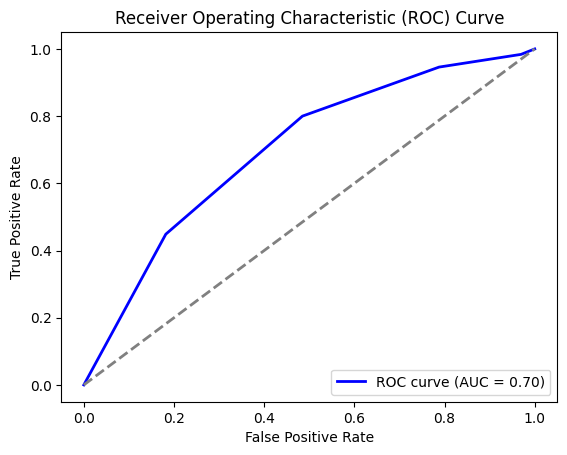

: 

In [ ]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()